#### *Description: Exercise File // by Using [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)*

In [1]:
import os
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.impute import SimpleImputer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# ***1. Open & Check Data***

In [2]:
original_data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [3]:
original_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
original_data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

**Checkpoint**  
- *All has unique ID number. Is it worth using 'id' column while analyzing data?*
- *'gender' and 'smoking_status' has more unique values than thought. Need to check them.*

In [6]:
original_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Purpose**: *To find out whether a person have suffered a stroke*    
**Target**: *stroke*  
**Features**  
>    - Categorical Data: *id, gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status*  
>    - Numerical Data: *age, avg_glucose_level, bmi*  
>    
>**Have to Fill NaN Values**: *bmi* - This dataset seems like quite easy to deal with Nan Values.  
>**Have to Change**: *gender, ever_married, work_type, Residence_type, smoking_status*  
>**Never Use**: *id*

In [7]:
original_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Question**: *Is it possible that 0.08-year-old have suffered a stroke?*

# ***2. Data Analysis***

### ***2-0. Target***

In [8]:
original_data.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

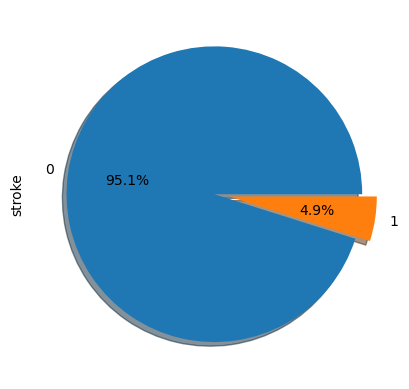

In [9]:
original_data.stroke.value_counts().plot.pie(explode=[0, 0.1], shadow=True, autopct="%1.1f%%")
plt.show()

### ***2-1. Numerical***

In [10]:
numericals = ['age', 'avg_glucose_level', 'bmi']

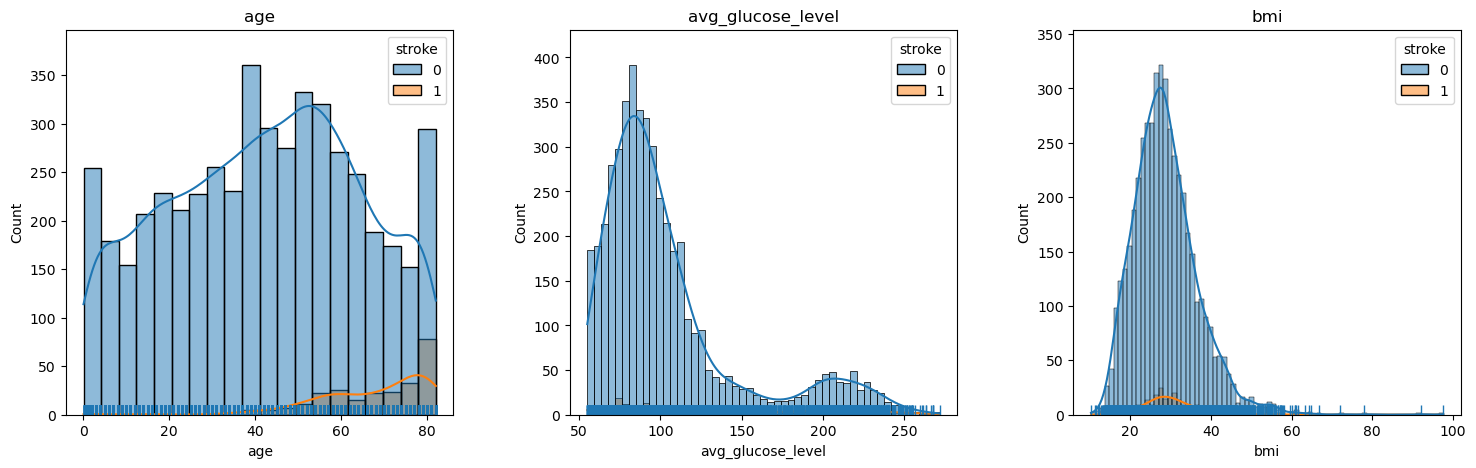

In [11]:
# Check Numerical Data Distribution
f, ax = plt.subplots(1, 3, figsize=(18, 5))

for idx, t in enumerate(numericals):
    sns.histplot(data=original_data, x=t, hue='stroke', kde=True, ax=ax[idx])
    sns.rugplot(data=original_data, x=t, ax=ax[idx])
    ax[idx].set_title(f"{t}")

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

**Checkpoint**  
- Looks like the elders are more likely to suffer a stroke more than the youngers.
- Numerical Data seems to be skewed. How much?

<Axes: >

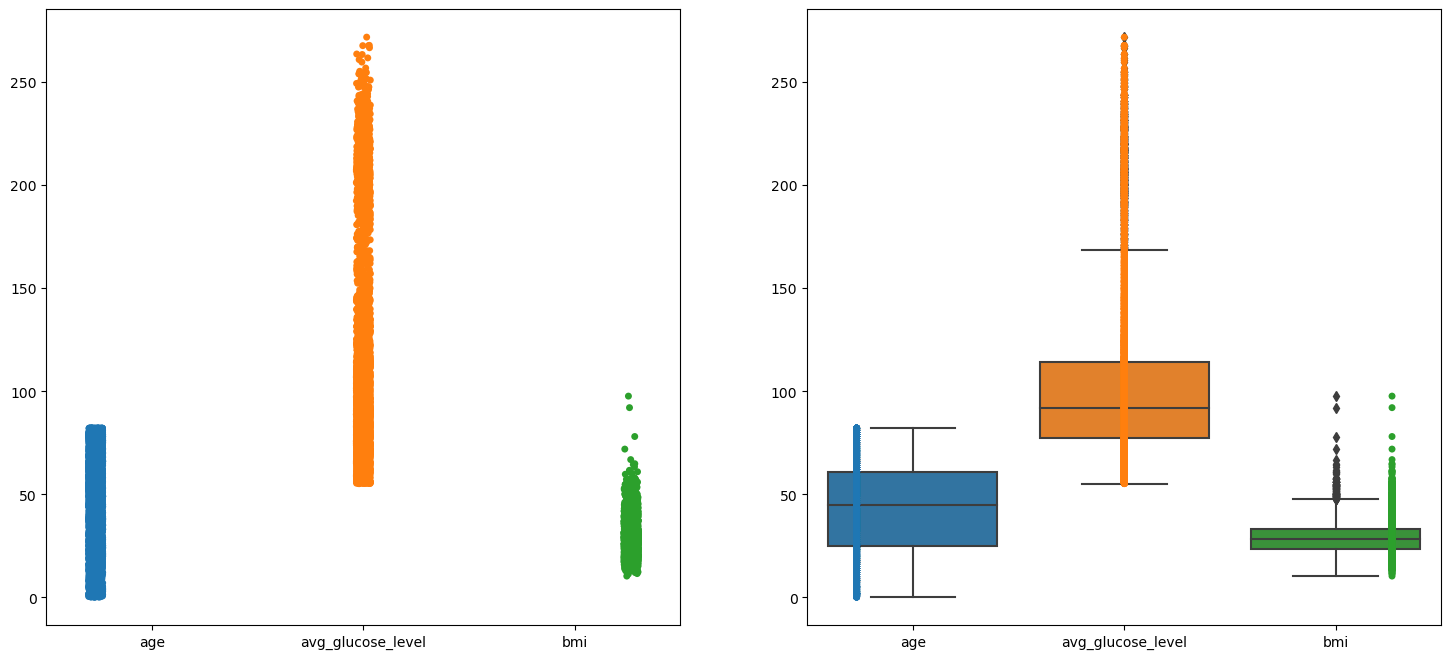

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.stripplot(data=original_data[numericals], jitter=True, dodge=True, ax=ax[0])
sns.stripplot(data=original_data[numericals], jitter=False, dodge=True, ax=ax[1])
sns.boxplot(data=original_data[numericals], ax=ax[1])

*Looks like there are some outliers in bmi, and especially many in avg_glucose_level.*

In [13]:
# Skewness and Kurtosis(check outliers)
skew_table = pd.DataFrame([[original_data[x].skew(), original_data[x].kurt()] for x in numericals])
skew_table

,0,1
0,-0.137059,-0.991010
1,1.572284,1.680479
2,1.055340,3.362659


*All numerical data are highly skewed, and it seems like there are many outliers. Should I need to get rid of those? How?*

<Axes: ylabel='Density'>

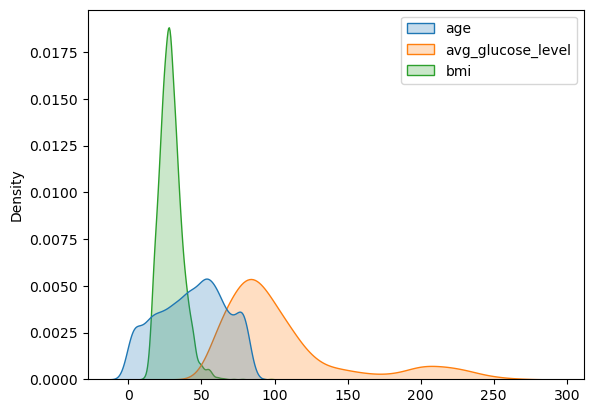

In [14]:
sns.kdeplot([original_data['age'], original_data['avg_glucose_level'], original_data['bmi']], fill=True)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x400 with 0 Axes>

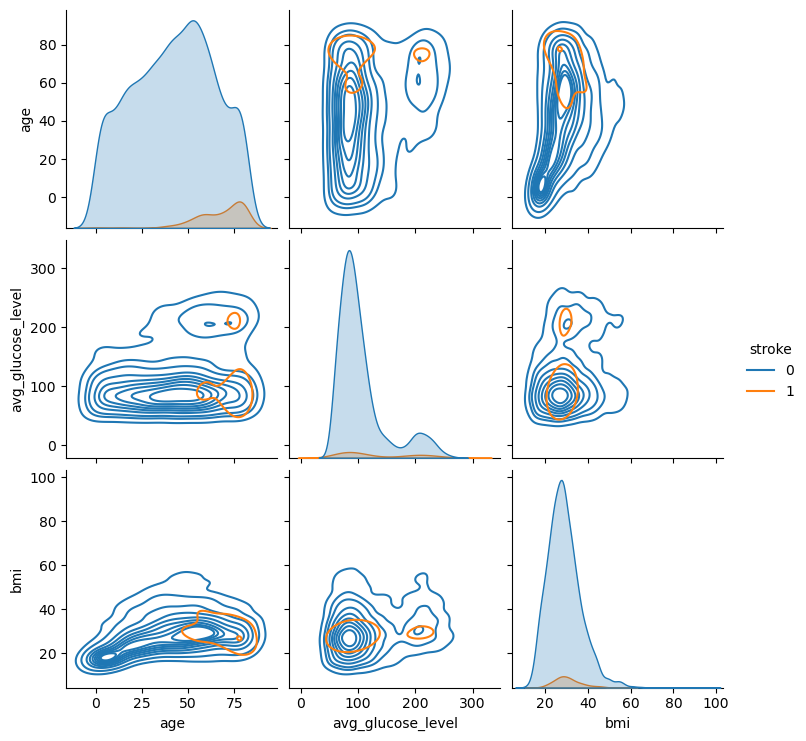

In [15]:
plt.figure(figsize=(4, 4))
sns.pairplot(original_data[numericals + ['stroke']], hue='stroke', kind='kde')
plt.show()

*Are there some correlations between data in numericals?*

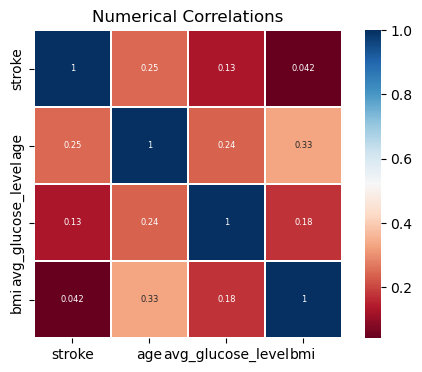

In [16]:
# Numerical Data Correlation

plt.figure(figsize=(6, 4)) 
colormap = plt.cm.RdBu
heatmap_data = original_data[['stroke', 'age', 'avg_glucose_level', 'bmi']]
plt.title("Numerical Correlations")
sns.heatmap(data=heatmap_data.astype(float).corr(), cmap=colormap, linewidths=0.1, vmax=1.0, square=True, annot=True, annot_kws={"size": 6})

plt.show()
del heatmap_data

*Seems like numerical features are not that much correlated with each other.*

### ***2-2. Categorical***

In [17]:
categoricals = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for x in categoricals:
    print(list(sorted(original_data[x].unique())))

['Female', 'Male', 'Other']
[0, 1]
[0, 1]
['No', 'Yes']
['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']
['Rural', 'Urban']
['Unknown', 'formerly smoked', 'never smoked', 'smokes']


In [18]:
pd.crosstab(original_data['gender'], original_data['stroke'], margins=True).style.background_gradient(cmap='summer_r')

stroke,0,1,All
gender,,,
Female,2853,141,2994
Male,2007,108,2115
Other,1,0,1
All,4861,249,5110


*'Female' has the most numbers, and there is only 1 data in 'Other'.*

In [19]:
pd.crosstab(original_data['hypertension'], original_data['stroke'], margins=True).style.background_gradient(cmap='summer_r')

stroke,0,1,All
hypertension,,,
0,4429,183,4612
1,432,66,498
All,4861,249,5110


In [20]:
pd.crosstab(original_data['heart_disease'], original_data['stroke'], margins=True).style.background_gradient(cmap='summer_r')

stroke,0,1,All
heart_disease,,,
0,4632,202,4834
1,229,47,276
All,4861,249,5110


*In 'hyperTension' and 'heart_disease', it seems like ratios of people who has those are small.*

In [21]:
pd.crosstab(original_data['ever_married'], original_data['stroke'], margins=True).style.background_gradient(cmap='summer_r')

stroke,0,1,All
ever_married,,,
No,1728,29,1757
Yes,3133,220,3353
All,4861,249,5110


In [22]:
pd.crosstab(original_data['work_type'], original_data['stroke'], margins=True).style.background_gradient(cmap='summer_r')

stroke,0,1,All
work_type,,,
Govt_job,624,33,657
Never_worked,22,0,22
Private,2776,149,2925
Self-employed,754,65,819
children,685,2,687
All,4861,249,5110


- Unlike others, people who never worked haven't suffered stroke. However, it might be because number of those are extremely small.
- On the contrary, 'children', also have low counts - almost 0, is not that much little.

In [23]:
pd.crosstab(original_data['Residence_type'], original_data['stroke'], margins=True).style.background_gradient(cmap='summer_r')

stroke,0,1,All
Residence_type,,,
Rural,2400,114,2514
Urban,2461,135,2596
All,4861,249,5110


In [24]:
pd.crosstab(original_data['smoking_status'], original_data['stroke'], margins=True).style.background_gradient(cmap='summer_r')

stroke,0,1,All
smoking_status,,,
Unknown,1497,47,1544
formerly smoked,815,70,885
never smoked,1802,90,1892
smokes,747,42,789
All,4861,249,5110


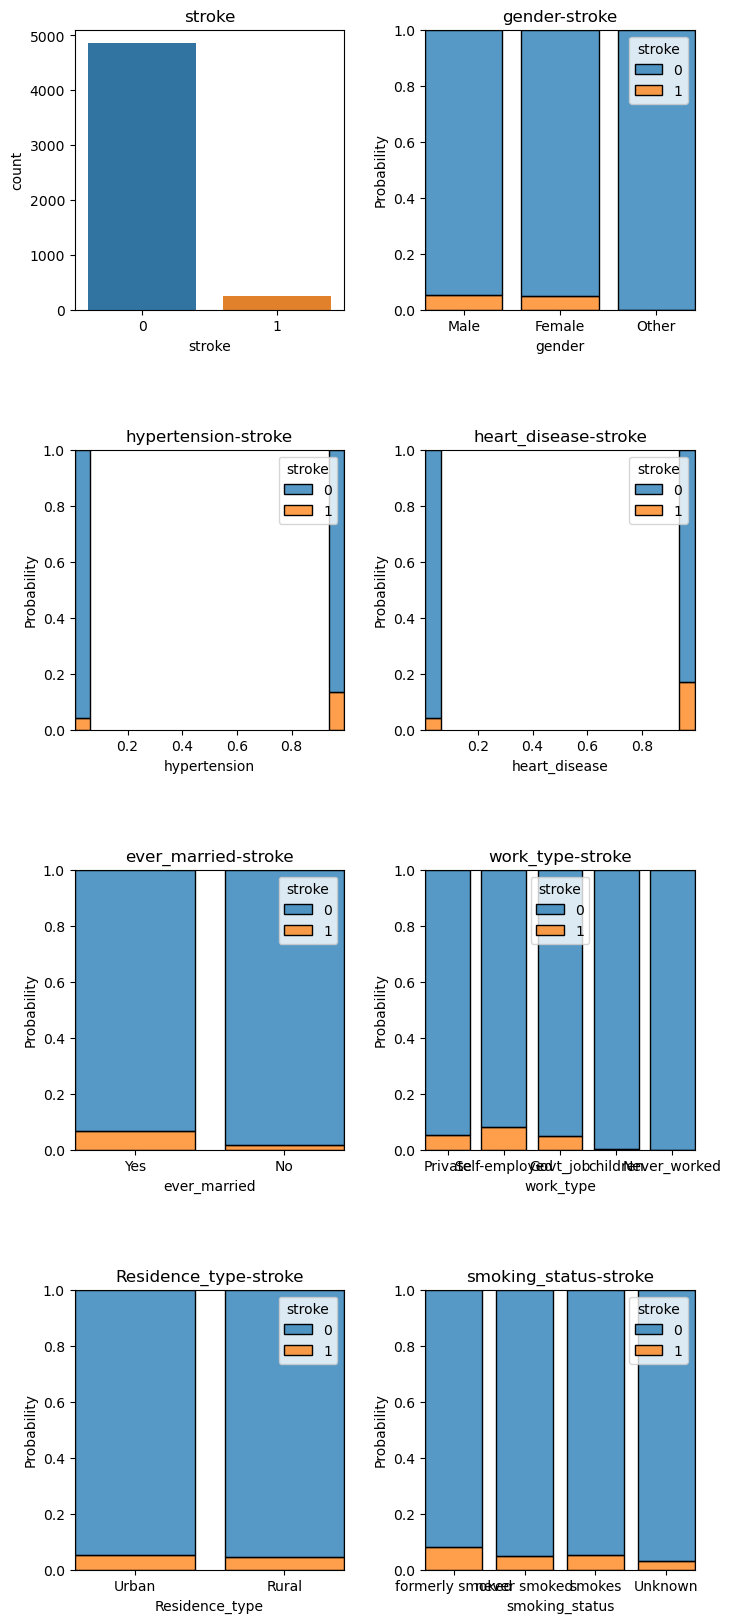

In [25]:
# Categorical Data Distribution - stroke probability
f, ax = plt.subplots(4, 2, figsize=(8, 20))

sns.countplot(data=original_data, x='stroke', ax=ax[0, 0])
ax[0, 0].set_title('stroke')

for idx, t in enumerate(categoricals, start=1):
    a, b = divmod(idx, 2)
    sns.histplot(data=original_data, x=t, hue='stroke', shrink=0.8, multiple='fill', stat='probability', ax=ax[a, b])
    ax[a, b].set_title(f'{t}-stroke')


plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

**Checkpoints**  
>- *In gender graph, male and female have almost same stroke-suffered probability.*
>- *Probabilities were higher if person have hypertension or heart_disease, or have married at least once had higher stroke rate.*
>- *Children and people who have never worked had almost zero rate, compared to others.*
>- *Person who smoke formerly have quite higher probability than others.*

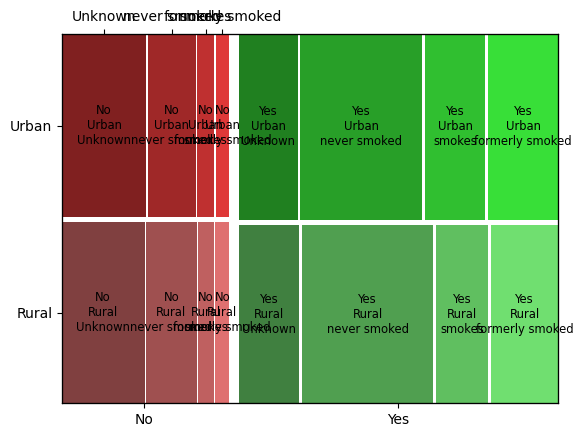

In [26]:
# statsmodels.graphics.mosaicplot.mosaic: useful when dataset is Multi+Categorical
mosaic(original_data.sort_values('stroke'), ['ever_married', 'Residence_type', 'smoking_status'], gap=0.02)
plt.show()

### ***2-3. Compose***

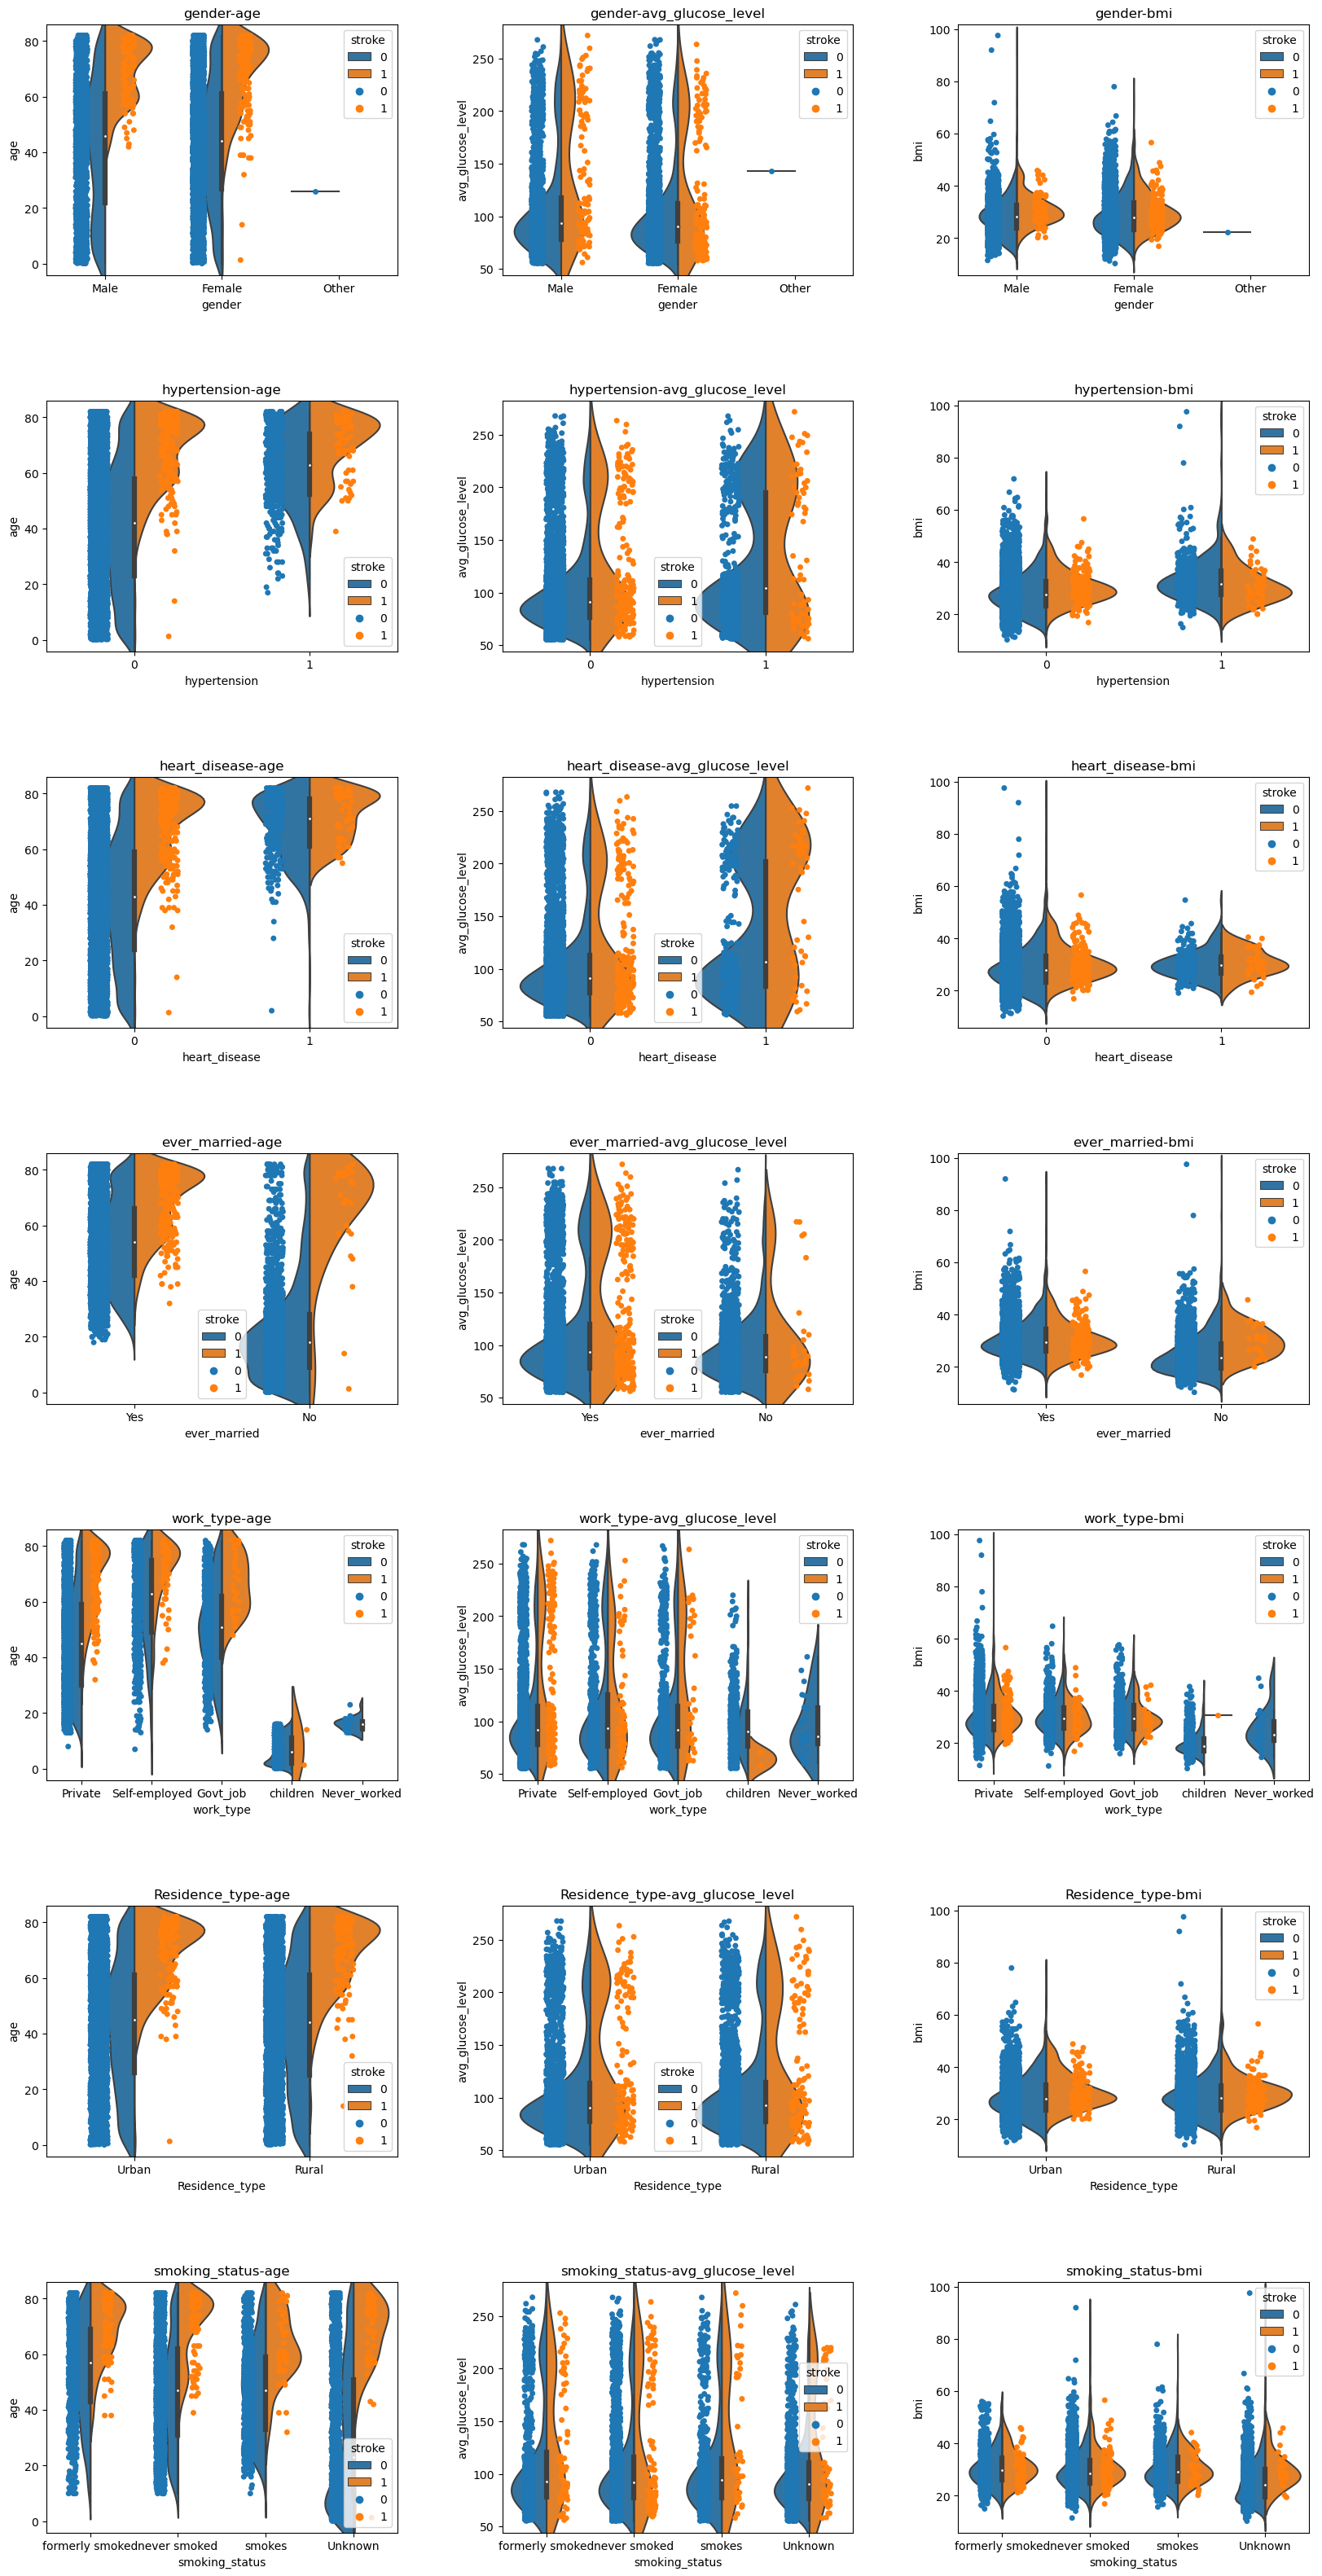

In [27]:
f, ax = plt.subplots(7, 3, figsize=(20, 40))

for cidx, c in enumerate(categoricals):
    for nidx, n in enumerate(numericals):
        sns.violinplot(data=original_data, x=c, y=n, hue='stroke', split=True, ax=ax[cidx, nidx])
        sns.stripplot(data=original_data, x=c, y=n, hue='stroke', jitter=True, dodge=True, ax=ax[cidx, nidx])
        ax[cidx, nidx].set_title(f"{c}-{n}")
        
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

# ***3. Data Preprocessing***

### ***Drop Data***

In [28]:
dp_data = original_data.drop(['id'], axis=1)

### ***Fill NaN Values & Remove Outliers***

In [29]:
# Fill NaN Values in bmi - to mean
dp_data['bmi'].fillna(np.mean(dp_data['bmi']), inplace=True)

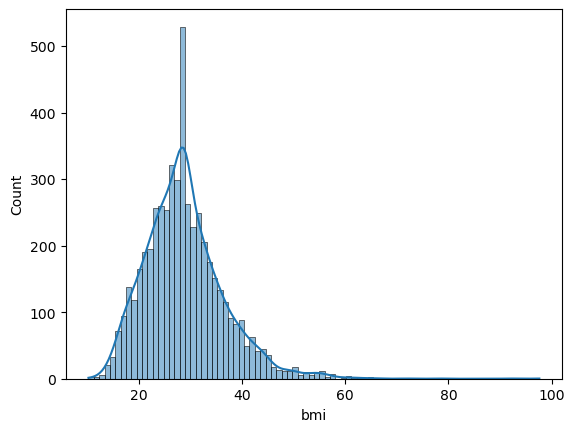

In [30]:
sns.histplot(dp_data['bmi'], kde=True)
plt.show()

In [31]:
dp_data.shape

(5110, 11)

In [32]:
# Fix outliers in numerical data
# highly skewed => Can't use Z-score, used quartiles instead
def iqr(q1, q3):
    return q3 - q1

def boundaries(q1, q3, IQR):
    return [q1 - IQR * 1.5, q3 + IQR * 1.5]

def outliers(col):
    q1, q3 = np.percentile(dp_data[col], [25, 75])
    IQR = iqr(q1, q3)
    low_bound, high_bound = boundaries(q1, q3, IQR)
    
    return dp_data.index[(dp_data[col] < low_bound) | (dp_data[col] > high_bound)]

In [33]:
for n in numericals:
    print(len(outliers(n)))
    # dp_data.drop(outliers(n), inplace=True)

0
627
126


In [34]:
# In first version, I dropped outliers, but now, I'll try to use log() instead.
# It won't be applied to age, cause there's no outliers.
for n in ['avg_glucose_level', 'bmi']:
    dp_data[n] = np.log(dp_data[n])

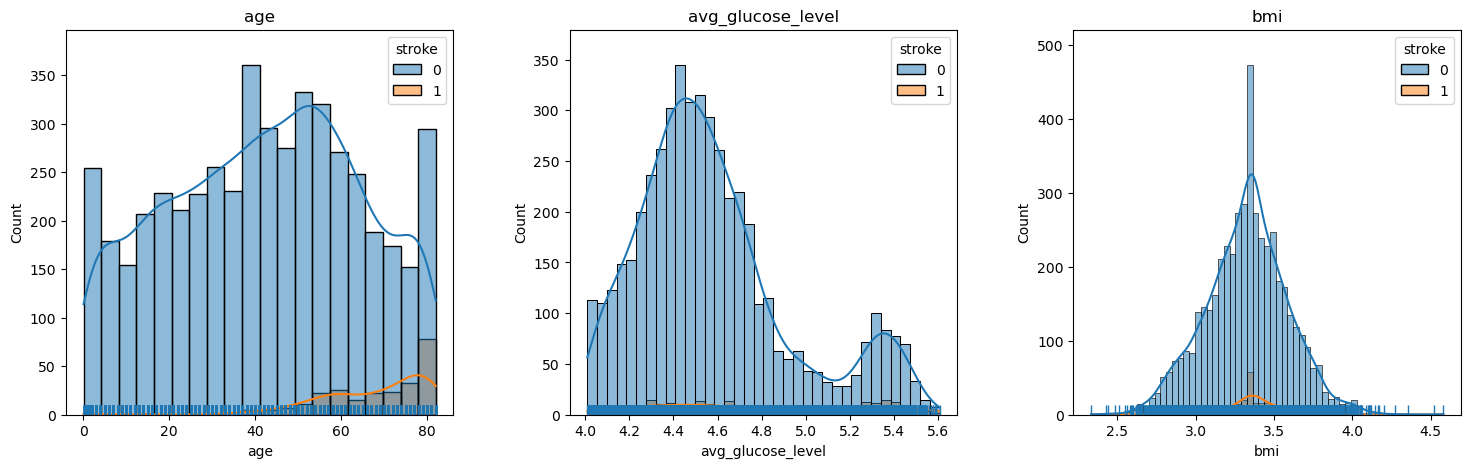

In [35]:
# Check Numerical Data Distribution After Fixing Outliers
f, ax = plt.subplots(1, 3, figsize=(18, 5))

for idx, t in enumerate(numericals):
    sns.histplot(data=dp_data, x=t, hue='stroke', kde=True, ax=ax[idx])
    sns.rugplot(data=dp_data, x=t, ax=ax[idx])
    ax[idx].set_title(f"{t}")

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [36]:
# Skewness and Kurtosis After Removing Outliers
skew_table = pd.DataFrame([[dp_data[x].skew(), dp_data[x].kurt()] for x in numericals])
skew_table

,0,1
0,-0.137059,-0.991010
1,0.882751,0.148188
2,-0.014730,0.367914


In [37]:
dp_data.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

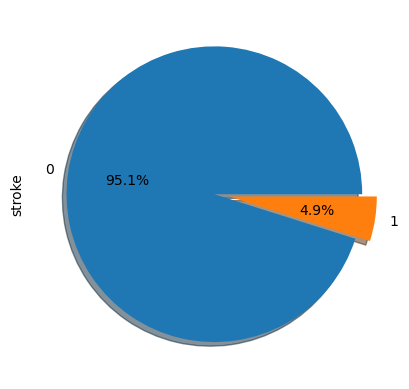

In [38]:
dp_data.stroke.value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%", shadow=True)
plt.show()

*Imbalance of target label is increased. I should try to decrease this by resampling data.*

### ***Resampling Data***

In [39]:
# Upsampling Data
from sklearn.utils import resample
st_0 = dp_data.loc[dp_data['stroke']==0]
st_1 = dp_data.loc[dp_data['stroke']==1]

st_1 = resample(st_1, replace=True, n_samples=st_0.shape[0], random_state=42)

In [40]:
rdp_data = pd.DataFrame(np.concatenate((st_0, st_1)))
del st_0, st_1

In [41]:
rdp_data.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

<Axes: ylabel='stroke'>

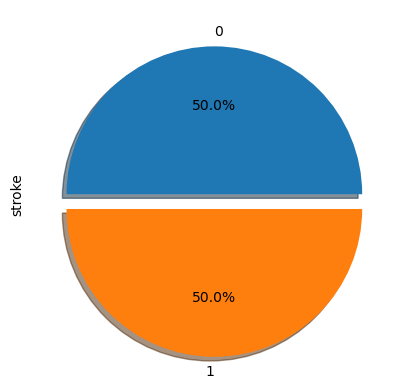

In [42]:
rdp_data['stroke'].value_counts().plot.pie(explode=[0, 0.1], shadow=True, autopct="%1.1f%%")

### ***Change Categorical Data***

In [43]:
# gender: I didn't drop 'Other', cause there's no evidence that it is just a wrong sample
rdp_data['gender'] = rdp_data['gender'].map({'Female':0, 'Male':1, 'Other':2})

# ever_married
rdp_data['ever_married'] = rdp_data['ever_married'].map({'No':0, 'Yes':1})

# work_type
rdp_data['work_type'] = rdp_data['work_type'].map({'Govt_job':0, 'Never_worked':1, 'Private':2, 'Self-employed':3, 'children':4})

# Residence_type
rdp_data['Residence_type'] = rdp_data['Residence_type'].map({'Rural':0, 'Urban':1})

# smoking_status
rdp_data['smoking_status'] = rdp_data['smoking_status'].map({'formerly smoked':0, 'smokes':1, 'never smoked':2, 'Unknown':3})

### ***Correlation Check***

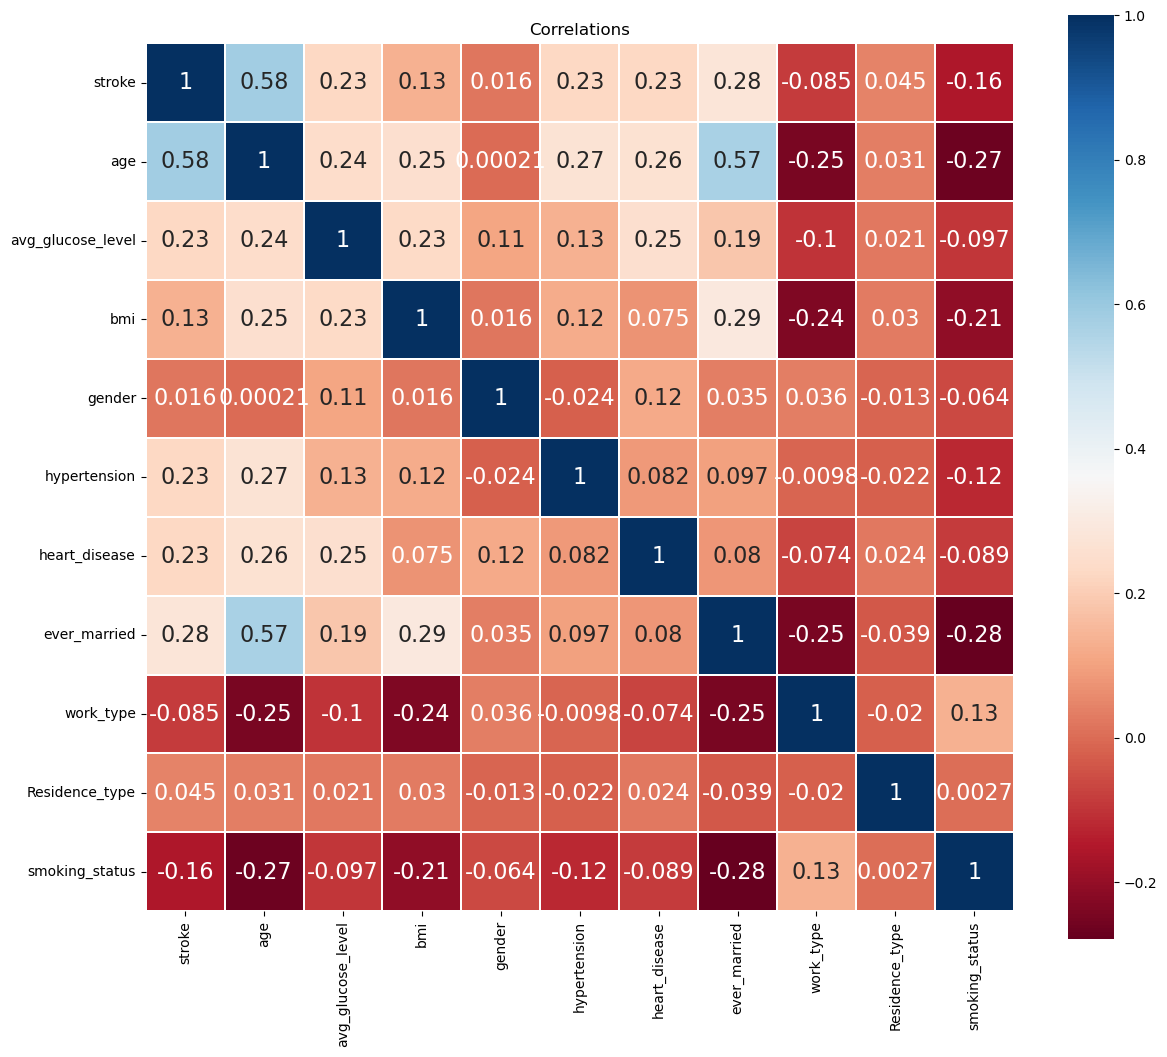

In [44]:
heatmap_data = rdp_data[['stroke', 'age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]
colormap=plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title("Correlations")

sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, annot=True, cmap=colormap, square=True, annot_kws={'size':16})
del heatmap_data

*Correlation values of age=stroke, age-ever_married are quite high, while others are low.      
Those are lower than 0.7, so I will keep going without additional progresses to reduce them.*

### ***One-hot Encoding***

In [45]:
rdp_data = pd.get_dummies(data=rdp_data, drop_first=True, columns = ['gender','ever_married','work_type','Residence_type','smoking_status'])
rdp_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_1,gender_2,ever_married_1,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_1,smoking_status_1,smoking_status_2,smoking_status_3
0,3.0,0,0,4.555139,2.890372,0,1,0,0,0,0,0,1,0,0,0,1
1,58.0,1,0,4.476882,3.668677,0,1,0,1,0,1,0,0,1,0,1,0
2,8.0,0,0,4.708539,2.867899,0,0,0,0,0,1,0,0,1,0,0,1
3,70.0,0,0,4.234686,3.580737,0,0,0,1,0,1,0,0,0,0,0,0
4,14.0,0,0,5.083142,2.949688,0,1,0,0,1,0,0,0,0,0,0,1


In [46]:
# change label type from object to numeric
rdp_data = rdp_data.apply(pd.to_numeric, errors='coerce')

# ***4. Make Base ML Model & Prediction***

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [48]:
X = rdp_data.drop(['stroke'], axis=1)
y = rdp_data['stroke']

In [49]:
feature_names = list(X.columns)

In [50]:
X = StandardScaler().fit_transform(X)

In [51]:
X = pd.DataFrame(X, columns=feature_names)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [54]:
print(f"Total num: {y_test.shape[0]} // Accuracy: {round(metrics.accuracy_score(preds, y_test) * 100, 2)}")

Total num: 2431 // Accuracy: 99.01


<Figure size 600x600 with 0 Axes>

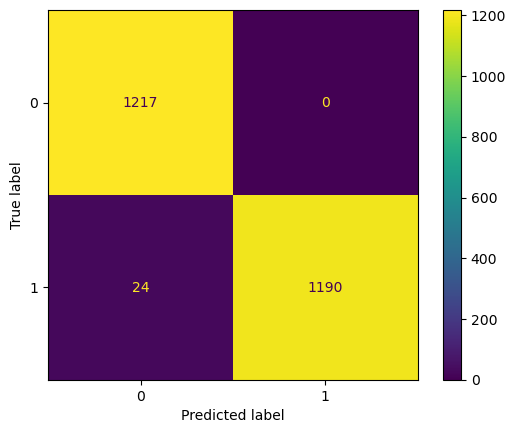

In [55]:
plt.figure(figsize=(6, 6))
conf = confusion_matrix(preds, y_test, labels=model.classes_)
ConfusionMatrixDisplay(conf, display_labels=model.classes_).plot()
plt.show()

                   Importances
age                     0.3846
avg_glucose_level       0.2024
bmi                     0.1784
ever_married_1          0.0341
hypertension            0.0277
gender_1                0.0229
smoking_status_2        0.0227
heart_disease           0.0218
Residence_type_1        0.0205
work_type_4             0.0204
work_type_2             0.0179
work_type_3             0.0165
smoking_status_3        0.0150
smoking_status_1        0.0149
work_type_1             0.0001
gender_2                0.0000


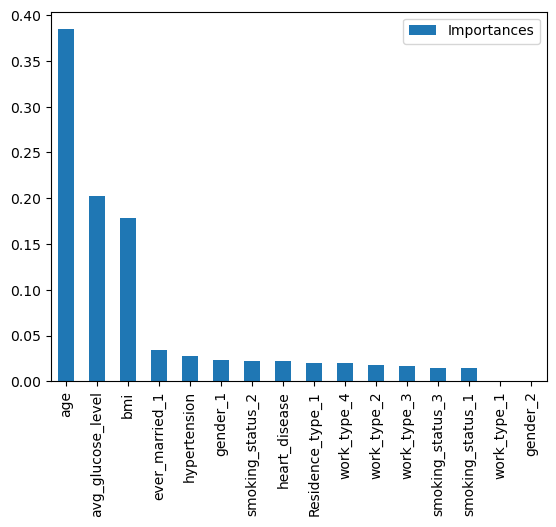

In [56]:
importances = pd.DataFrame(np.round(model.feature_importances_, 4), index=feature_names, columns=['Importances']).sort_values(by='Importances', ascending=False)
print(importances)
importances.plot.bar()
plt.show()

*Similar to correlation graph, age was the most important feature in model.  
Others, which showed certain level of correlations with stroke, like avg_glucose_level, ever_married, hypertension, etc., are also picked as important features.*